In [28]:
import pandas as pd
import numpy as np
target_data = pd.read_csv("complete_data_to_value.csv", delimiter=',')
gtarget_data = target_data.loc[:,['Latitude', 'Longitude']]

gtraintest_data = pd.read_csv("coords_diamonds.csv", delimiter=',')
gtraintest_data = gtraintest_data.loc[:,['latitude', 'longitude ']]
gtraintest_data.rename(columns = {'longitude ':'Longitude', 'latitude': 'Latitude'}, inplace = True)

In [29]:
gtraintest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   53930 non-null  object 
 1   Longitude  53930 non-null  float64
dtypes: float64(1), object(1)
memory usage: 842.8+ KB


In [30]:
for i, val in enumerate(gtraintest_data['Latitude']):
    try:
        float(val)
    except ValueError:
        print(val)
        print(i)

33q.200088
48185


In [31]:
gtraintest_data['Latitude']=gtraintest_data['Latitude'].replace(['33q.200088'],'33.200088')
gtraintest_data['Latitude'] = gtraintest_data['Latitude'].astype(float) 

In [32]:
gtraintest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   53930 non-null  float64
 1   Longitude  53930 non-null  float64
dtypes: float64(2)
memory usage: 842.8 KB


In [33]:
traintest_data = pd.read_csv("diamonds.csv", delimiter=',')
traintest_data = traintest_data.drop(["Unnamed: 0"], axis=1)



In [34]:
print(traintest_data['cut'].unique())
print(traintest_data['color'].unique())
print(traintest_data['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']
['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2']


In [35]:
dic_cut = {'Very Goo!d': 'Very Good', "P*'remium": 'Premium', 'I#deal': 'Ideal', 
           '#Very Good': 'Very Good', 'P?remium': 'Premium', "*'Ideal": 'Ideal', '!Good': 'Good', 'Pre!mium': 'Premium', 'Pr?emium': 'Premium', 
           'Very Go#od': 'Very Good', 'Ide&al': 'Ideal', 'Ide!al': 'Ideal', 'Id!eal': 'Ideal', '&Premium': 'Premium', 'Go?od': 'Good', 'G#ood': 'Good', 
           "Very *'Good": 'Very Good', "Ide*'al": 'Ideal', 'V&ery Good': 'Very Good', '&Ideal': 'Ideal', 'Very G#ood': 'Very Good'}
dic_col = {"*'E": 'E', '#F': 'F', '&G': 'G', '!H': 'H', '?J': 'J', '#D': 'D', '&I': 'I', '!I': 'I', '?G': 'G', 
           '#H': 'H', '?H': 'H', '?E': 'E', "*'F": 'F', '!E': 'E', '&F': 'F', '#G': 'G', "*'I": 'I', '!F': 'F', '&E': 'E',}
dic_clar = {'S?I1': 'SI1', 'SI!1': 'SI1', '&VS2': 'VS2', '&SI2': 'SI2', "S*'I1": 'SI1', 'VS?1': 'VS1', 
            "S*'I2": 'SI2', '#VS1': 'VS1', 'V&S2': 'VS2', 'V!S2': 'VS2', '!VS2': 'VS2', 'VS#2': 'VS2', "VVS*'2": 'VVS2', 
            "*'SI2": 'SI2', 'VV?S1': 'VVS1', 'S&I1': 'SI1', "*'SI1": 'SI1', 'SI?1': 'SI1', 'VV#S1': 'VVS1', 'V#S2': 'VS2', '#SI!1': 'SI1', 'S!I2': 'SI2'}

In [36]:
dic_of_dics = {'cut': dic_cut, 'color': dic_col, 'clarity': dic_clar}
for col, err_dic in dic_of_dics.items():
    for key, val in err_dic.items():
        traintest_data[col]=traintest_data[col].replace([key],val)

print(traintest_data['cut'].unique())
print(traintest_data['color'].unique())
print(traintest_data['clarity'].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [37]:
transitory_traintest_data=traintest_data.copy()
transitory_traintest_data=transitory_traintest_data.dropna()
transitory_traintest_data=transitory_traintest_data[transitory_traintest_data['z']>0]
x_r = (transitory_traintest_data['x']/transitory_traintest_data['z']).mean()
y_r = (transitory_traintest_data['y']/transitory_traintest_data['z']).mean()
z_r = (transitory_traintest_data['z']/transitory_traintest_data['carat']).mean()
print(x_r, y_r, z_r)

1.6196506596586313 1.6208012346635268 5.560643933833876


In [38]:
def compute_value_z(row):
    if row['z']==0:
        return row['carat']*z_r
    elif row['z']<0:
        return -row['z']
    else:
        return row['z']
def compute_value_x(row):
    if pd.isna(row['x']) or row['x']==0:
        return row['z']*x_r
    elif row['x']<0:
        return -row['x']
    else:
        return row['x']
def compute_value_y(row):
    if pd.isna(row['y']) or row['y']==0:
        return row['z']*y_r
    elif row['y']<0:
        return -row['y']
    else:
        return row['y']
def compute_value_depth(row):
    if pd.isna(row['depth']) or row['depth']==0:
        # the definition of depth:
        return 100*2*row['z']/(row['x']+row['y'])
    else:
        return row['depth']

traintest_data['z'] = traintest_data.apply(compute_value_z, axis=1)
traintest_data['x'] = traintest_data.apply(compute_value_x, axis=1)
traintest_data['y'] = traintest_data.apply(compute_value_y, axis=1)
traintest_data['depth'] = traintest_data.apply(compute_value_depth, axis=1)

In [39]:
(traintest_data['x']<=0).sum()

0

In [40]:
full_traintest_data = pd.concat([traintest_data,gtraintest_data], axis =1)
full_traintest_data.describe()

,carat,depth,table,price,x,y,z,Latitude,Longitude
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.747905,57.457328,3933.054942,5.733038,5.735716,3.541764,38.137352,-86.693792
std,0.474035,1.420105,2.234578,3989.628569,1.122622,1.137712,0.710644,10.485185,39.773132
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,-82.862752,-173.985008
25%,0.400000,61.100000,56.000000,950.000000,4.710000,4.720000,2.910000,34.147778,-112.073333
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,39.457778,-87.889167
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000,42.800556,-78.680278
max,5.010000,79.000000,95.000000,18823.000000,20.264176,58.900000,31.800000,72.700000,178.017649


In [14]:


from scipy.spatial.distance import pdist, squareform
from scipy import stats

sample_df = full_traintest_data.sample(frac=0.2, random_state=42)

# Compute distance matrix
coords = sample_df[['Latitude', 'Longitude']].values
dist_mat = squareform(pdist(coords))

# Compute weights matrix
weights = 1 / dist_mat
weights[np.isinf(weights)] = 0
weights[np.isnan(weights)] = 0

# Compute Moran's I
price = sample_df['price'].values
n = len(price)
price_mean = np.mean(price)
price_var = np.var(price)
W = np.sum(weights)
num = np.sum(weights * (price - price_mean))
den = np.sum((price - price_mean) ** 2)
I = (n / W) * (num / den)

from scipy.stats import norm
# Compute the Moran's I test statistic
num = np.sum(dist_mat * (price - np.mean(price)))
denom = np.sum(dist_mat)
moran_I = num / denom / np.var(price)


# Compute the expected value of the test statistic under the null hypothesis
n = len(price)
expected_I = -1 / (n - 1)

# Compute the variance of the test statistic under the null hypothesis
var_I = (n * np.sum(dist_mat ** 2) - 2 * np.sum(dist_mat)) / (n ** 2 * np.sum(dist_mat))

# Compute the z-score and the p-value
z_score = (moran_I - expected_I) / np.sqrt(var_I)
p_value = 2 * norm.cdf(-np.abs(z_score))

print("Moran's I statistic is", moran_I)
print("z-score of Moran's I test is:",z_score)
print("p-value of Moran's I test is:",p_value)

C:\Users\Acer\AppData\Local\Temp\ipykernel_171704\3208770830.py:11: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / dist_mat


Moran's I statistic is -1.387360055587324e-06
z-score of Moran's I test is: 0.0009747698247591417
p-value of Moran's I test is: 0.9992222463296554


<Axes: >

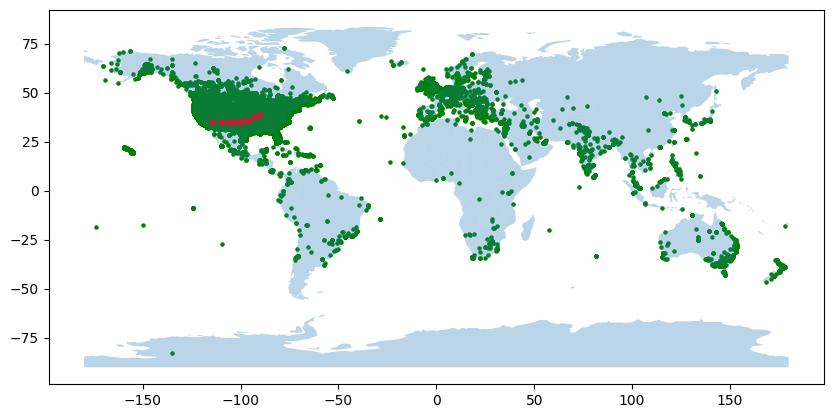

In [15]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(gtarget_data['Longitude'], gtarget_data['Latitude'])]
geo_target_data = GeoDataFrame(gtarget_data, geometry=geometry)

geometry2 = [Point(xy) for xy in zip(gtraintest_data['Longitude'], gtraintest_data['Latitude'])]
geo_traintest_data = GeoDataFrame(gtraintest_data, geometry=geometry2)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))


geo_traintest_data.plot(ax=ax, marker='o', color='green', markersize=5)
geo_target_data.plot(ax=ax, marker='o', color='red', markersize=15)

world.plot(ax=ax, alpha=0.3)

#gdf2.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='blue', markersize=5)

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder={}
for col in ['cut', 'color', 'clarity']:
    label_encoder[col] = LabelEncoder()
    traintest_data[col] = label_encoder[col].fit_transform(traintest_data[col])
traintest_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [17]:
traintest_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,2.553087,2.594103,3.834934,58.391858,57.457328,3933.054942,5.733038,5.735716,3.541764
std,0.474035,1.027740,1.701080,1.724571,13.997371,2.234578,3989.628569,1.122622,1.137712,0.710644
min,0.200000,0.000000,0.000000,0.000000,0.563444,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,60.800000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,20.264176,58.900000,31.800000


<Axes: >

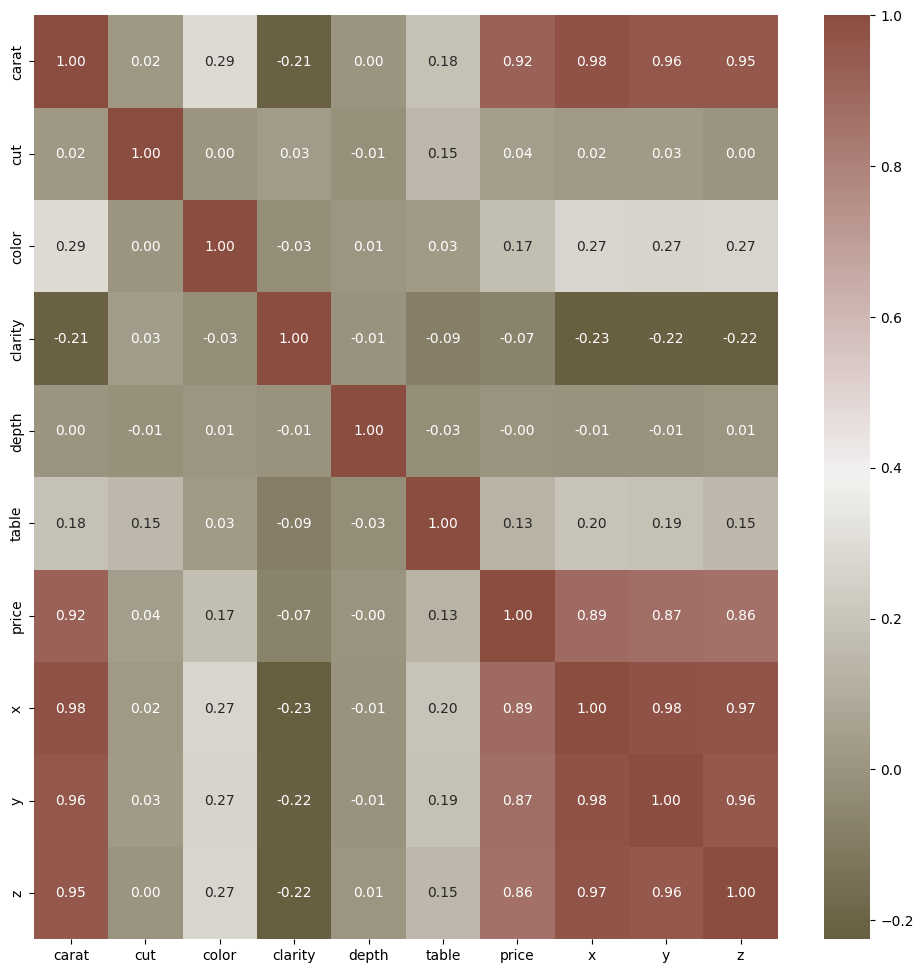

In [27]:
import seaborn as sns
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= traintest_data.corr()
f, ax = plt.subplots(figsize=(12,12))

# Remove the upper triangle
k = 10 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(traintest_data[cols].values.T)
triangle = np.zeros_like(cm, dtype=bool)
triangle[np.triu_indices_from(triangle)] = True

sns.heatmap(corrmat,cmap=cmap,annot=True, fmt='.2f', cbar=True)
#sns.heatmap(cm, mask=triangle,cmap=cmap, cbar=True, annot=True,  fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [294]:
#### CLEAN THIS!!!!
#traintest_data= traintest_data.dropna()
sample_traintest = traintest_data.sample(frac=0.2, random_state=42)
####

from sklearn.model_selection import train_test_split
# Assigning the featurs as X and trarget as y
X= sample_traintest.drop(["price"],axis =1)
y= sample_traintest["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=40)

In [295]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



# Building pipelins of standard scaler and model for varios regressors.

rand_for_pipe=Pipeline([("scalar1",StandardScaler()), ("rf_classifier_cabra",RandomForestRegressor())])
k_neigh_pipe=Pipeline([("scalar2",StandardScaler()), ("kn_classifier",KNeighborsRegressor())])
lin_reg_pipe=Pipeline([("scalar3",StandardScaler()), ("lr_classifier",LinearRegression())])
dec_tree_pipe=Pipeline([("scalar4",StandardScaler()), ("dt_classifier",DecisionTreeRegressor())])





# List of all the pipelines
pipelines = [rand_for_pipe, k_neigh_pipe, lin_reg_pipe, dec_tree_pipe]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "RandomForest", 1: "KNeighbors", 2: "LinearRegression",3: "DecisionTree"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [296]:
from sklearn.model_selection import cross_val_score
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

RandomForest: -664.750094 
KNeighbors: -947.878041 
LinearRegression: -1307.692088 
DecisionTree: -878.415803 


In [297]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

pred = rand_for_pipe.predict(X_test)
print('STATISTICS ON THE TEST DATA\n----------------------------')
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

STATISTICS ON THE TEST DATA
----------------------------
R^2: 0.9747003985509479
Adjusted R^2: 0.9746156585386512
RMSE: 620.0845666270048


In [298]:
target_data_wo_geo=target_data.loc[:, target_data.columns!='Latitude']
target_data_wo_geo=target_data_wo_geo.loc[:, target_data_wo_geo.columns!='Longitude']


for col in ['cut', 'color', 'clarity']:
    target_data_wo_geo[col]=label_encoder[col].transform(target_data_wo_geo[col])

In [299]:
target_data_wo_geo

,carat,cut,color,clarity,depth,table,x,y,z
0,0.71,1,5,7,63.1,58.0,5.64,5.71,3.58
1,0.83,2,3,4,62.1,55.0,6.02,6.05,3.75
2,0.50,2,1,5,61.5,55.0,5.11,5.16,3.16
3,0.39,3,6,4,61.6,59.0,4.67,4.71,2.89
4,0.32,3,3,4,62.1,56.0,4.43,4.40,2.74
5,0.90,1,2,3,63.3,57.0,6.08,6.14,3.87
6,0.51,2,0,4,60.9,57.0,5.20,5.17,3.16
7,1.12,2,3,7,62.1,54.8,6.64,6.66,4.13
8,0.40,2,3,7,62.4,56.0,4.72,4.74,2.95
9,0.36,3,5,5,62.7,59.0,4.54,4.58,2.86


In [300]:
prices_predicted = list(rand_for_pipe.predict(target_data_wo_geo))
print("The prices of the 10 lost diamonds is estimated to be", prices_predicted)

The prices of the 10 lost diamonds is estimated to be [2370.78, 3872.71, 1661.12, 661.47, 805.73, 3711.87, 1973.51, 9306.73, 978.35, 549.7]


# Second estimation

In [301]:
df_pr = pd.DataFrame()

df_pr['xyz']= traintest_data['x']*traintest_data['y']*traintest_data['z']/np.sqrt(traintest_data['x']**2+traintest_data['y']**2+traintest_data['z']**2)
df_pr['price']= traintest_data['price']
df_pr

,xyz,price
0,6.251064,326
1,5.814821,326
2,6.152366,327
3,7.171460,334
4,7.711944,335
...,...,...
53925,13.084313,2757
53926,13.333174,2757
53927,13.045163,2757
53928,14.899056,2757


In [303]:
df_pr.describe()

,xyz,price
count,53930.000000,53930.000000
mean,13.655025,3933.054942
std,5.402289,3989.628569
min,4.995253,326.000000
25%,8.935129,950.000000
50%,13.041108,2401.000000
75%,16.977868,5325.000000
max,164.367939,18823.000000


<Axes: >

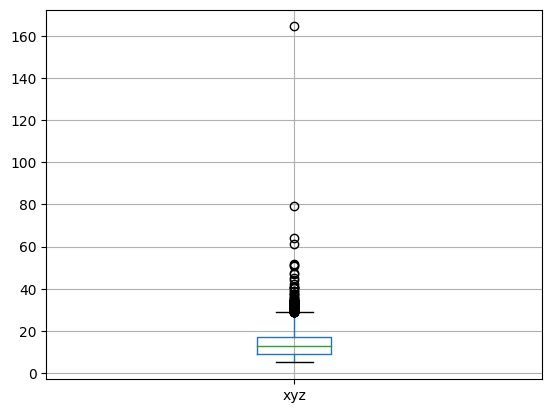

In [305]:
df_pr.boxplot('xyz')

<Axes: >

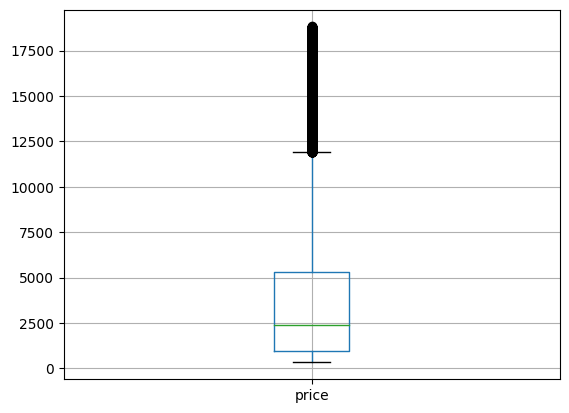

In [306]:
df_pr.boxplot('price')

In [307]:
df_pr[df_pr['xyz']>100]

,xyz,price
27425,164.367939,18034


In [308]:
df_pr = df_pr.drop(27425)

In [316]:
df_pr[df_pr['xyz']<5.5]

,xyz,price
14633,4.995253,5909


In [317]:
df_pr = df_pr.drop(14633)

In [319]:
#logxyz = np.log(df_pr['xyz'])
#logprice = np.log(df_pr['price'])

df_pr2= pd.DataFrame()

#df_pr2['logxyz'] = logxyz
#df_pr2['logprice'] = logprice

df_pr2['logxyz'] = np.log(df_pr['xyz'])
df_pr2['logprice'] = np.log(df_pr['price'])

#df_pr2.dropna()
#logxyz= logxyz.dropna()
#df_pr.plot(x= 'price', y = 'xyz')

#logprice = np.log(df_pr['price'])
#logprice= logprice.dropna();

df_pr2

,logxyz,logprice
0,1.832752,5.786897
1,1.760410,5.786897
2,1.816837,5.789960
3,1.970109,5.811141
4,2.042770,5.814131
...,...,...
53925,2.571414,7.921898
53926,2.590255,7.921898
53927,2.568417,7.921898
53928,2.701298,7.921898


<Axes: xlabel='logxyz', ylabel='logprice'>

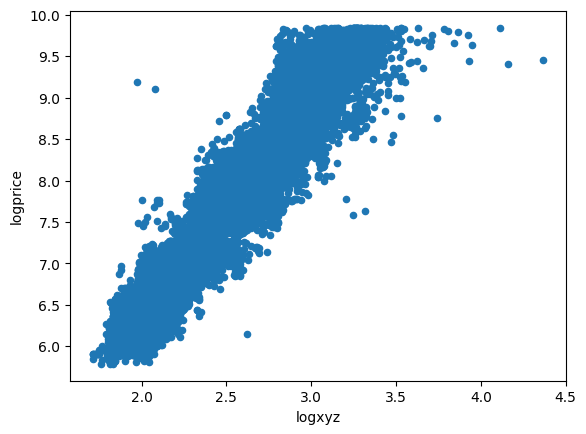

In [323]:
df_pr2.plot(kind = 'scatter', x= 'logxyz', y = 'logprice')

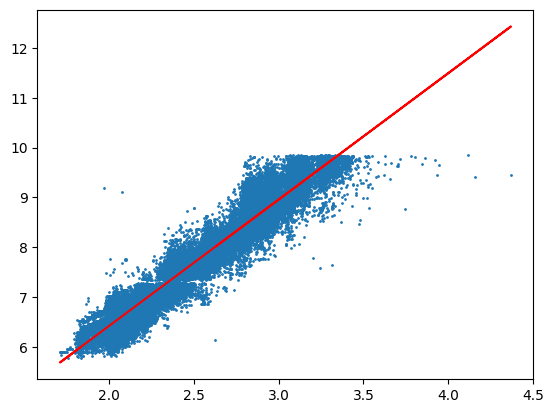

In [326]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#df_pr2= df_pr2.dropna()
X = df_pr2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_pr2.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

In [327]:
# The coefficients
print("Coefficients: \n", linear_regressor.coef_)
# The mean squared error
print("MSE: %.2f" % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(Y, Y_pred))

Coefficients: 
 [[2.53576567]]
MSE: 0.07
R^2: 0.93


In [339]:
tar_x = target_data_wo_geo['x']
tar_y = target_data_wo_geo['y']
tar_z = target_data_wo_geo['z']
target_logxyz = np.log(tar_x*tar_y*tar_z/np.sqrt(tar_x**2+tar_y**2+tar_z**2))
#linear_regressor.predict
target_logxyz.values


array([2.57407125, 2.68449129, 2.35334152, 2.17317432, 2.05831654,
       2.72516695, 2.36458346, 2.87814343, 2.20029182, 2.13176555])

In [356]:
prices_predicted2 = list(np.round(np.exp(linear_regressor.predict(target_logxyz.values.reshape(-1,1))).flatten(),2))
print("The prices of the 10 lost diamonds is estimated to be", prices_predicted2)

The prices of the 10 lost diamonds is estimated to be [2631.56, 3481.89, 1503.59, 952.18, 711.59, 3860.21, 1547.07, 5689.56, 1019.96, 857.27]


In [357]:
print(prices_predicted)
print(prices_predicted2)

[2370.78, 3872.71, 1661.12, 661.47, 805.73, 3711.87, 1973.51, 9306.73, 978.35, 549.7]
[2631.56, 3481.89, 1503.59, 952.18, 711.59, 3860.21, 1547.07, 5689.56, 1019.96, 857.27]
